# Visualize Training Logs - Overall Evaluation Metrics

During model training, generate logs in the `work_dirs` directory, parse information such as loss functions and evaluation metrics, and visualize them.

## Enter the MMSegmentation home directory

In [51]:
import os
os.chdir('mmsegmentation')

FileNotFoundError: [Errno 2] No such file or directory: 'mmsegmentation'

In [52]:
os.getcwd()

'/home/featurize/work/CFA/mmsegmentation'

## Import Toolkit

In [53]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Load the training log

In [54]:
# Log file path
log_path = './work_dirs/ZihaoDataset-KNet/20250408_072153/vis_data/scalars.json'

In [5]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [6]:
len(json_list)

241

In [16]:
eval(json_list[4])

{'base_lr': 2.3999999999999953e-05,
 'lr': 2.3999999999999953e-05,
 'data_time': 0.010705089569091797,
 'grad_norm': 37.278460788726804,
 'loss': 2.062128257751465,
 'decode.loss_ce.s0': 0.888392323255539,
 'decode.acc_seg.s0': 89.145751953125,
 'decode.loss_ce.s1': 0.3131355419754982,
 'decode.acc_seg.s1': 93.6636962890625,
 'decode.loss_ce.s2': 0.29972674399614335,
 'decode.acc_seg.s2': 94.30284118652344,
 'decode.loss_ce.s3': 0.2883472144603729,
 'decode.acc_seg.s3': 94.38400268554688,
 'aux.loss_ce': 0.2725263774394989,
 'aux.acc_seg': 87.32977294921875,
 'time': 0.6391801595687866,
 'iter': 400,
 'memory': 15525,
 'step': 400}

In [17]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

In [18]:
df_train

,base_lr,lr,data_time,grad_norm,loss,decode.loss_ce.s0,decode.acc_seg.s0,decode.loss_ce.s1,decode.acc_seg.s1,decode.loss_ce.s2,decode.acc_seg.s2,decode.loss_ce.s3,decode.acc_seg.s3,aux.loss_ce,aux.acc_seg,time,iter,memory,step
0,9.000000e-07,9.000000e-07,0.012627,249.518163,7.616134,1.423063,21.277142,1.769999,21.089077,1.979924,26.343346,1.892058,23.649883,0.551090,32.064629,0.639854,15.0,15695.0,15.0
1,6.000000e-06,6.000000e-06,0.013025,145.907835,5.755953,1.413448,18.104744,1.239060,66.435051,1.290920,43.441296,1.273047,51.388836,0.539479,52.954292,0.643773,100.0,15525.0,100.0
2,1.200000e-05,1.200000e-05,0.010636,90.275525,4.175237,1.361797,37.201500,0.757825,76.197906,0.765113,74.636932,0.807888,81.233597,0.482614,76.236816,0.640174,200.0,15525.0,200.0
3,1.800000e-05,1.800000e-05,0.011912,39.528711,2.832925,1.207940,55.588913,0.400211,81.700325,0.452877,76.227570,0.402384,77.218246,0.369513,73.508453,0.643655,300.0,15525.0,300.0
4,2.400000e-05,2.400000e-05,0.010705,37.278461,2.062128,0.888392,89.145752,0.313136,93.663696,0.299727,94.302841,0.288347,94.384003,0.272526,87.329773,0.639180,400.0,15525.0,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,6.000000e-05,6.000000e-05,0.011300,1.745991,0.070834,0.015541,99.356270,0.015667,99.297523,0.015574,99.300003,0.015636,99.293427,0.008415,99.029160,0.640750,19600.0,15524.0,19600.0
197,6.000000e-05,6.000000e-05,0.011092,0.827867,0.082405,0.018087,99.453354,0.018135,99.454117,0.018167,99.452782,0.018472,99.451157,0.009544,99.390411,0.639806,19700.0,15524.0,19700.0
198,6.000000e-05,6.000000e-05,0.011562,1.031798,0.071929,0.015801,99.419495,0.015569,99.444389,0.015564,99.441055,0.015541,99.443817,0.009455,99.147415,0.644910,19800.0,15524.0,19800.0
199,6.000000e-05,6.000000e-05,0.011159,0.384432,0.060091,0.013140,99.558640,0.012962,99.574661,0.012927,99.569130,0.013133,99.567886,0.007929,99.076271,0.641423,19900.0,15524.0,19900.0


In [19]:
df_test

,aAcc,mIoU,mAcc,mDice,mFscore,mPrecision,mRecall,data_time,time,step
0,95.31,89.82,96.06,94.60,94.60,93.33,96.06,0.023532,1.831998,500.0
1,95.81,90.40,95.94,94.92,94.92,93.99,95.94,0.012010,0.397500,1000.0
2,97.44,93.90,96.95,96.84,96.84,96.74,96.95,0.011557,0.283659,1500.0
3,97.38,93.51,96.61,96.64,96.64,96.68,96.61,0.010592,0.283332,2000.0
4,97.30,93.40,96.60,96.58,96.58,96.58,96.60,0.011032,0.283530,2500.0
5,96.05,91.34,94.04,95.37,95.37,96.98,94.04,0.010622,0.282805,3000.0
6,97.44,93.80,97.18,96.80,96.80,96.44,97.18,0.009215,0.281193,3500.0
7,97.90,95.02,97.34,97.44,97.44,97.56,97.34,0.009600,0.281423,4000.0
8,97.08,93.59,96.97,96.67,96.67,96.38,96.97,0.011394,0.283044,4500.0
9,97.49,94.32,97.03,97.07,97.07,97.11,97.03,0.008815,0.282096,5000.0


## Export training log form

In [42]:
df_train.to_csv('charts/KNet-TrainingLog-TrainSet.csv', index=False)
df_test.to_csv('charts/KNet-TrainingLog-TestSet.csv', index=False)

## Visualization helper functions

In [43]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    Randomly generate a plot line style
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## Training set loss function

In [44]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

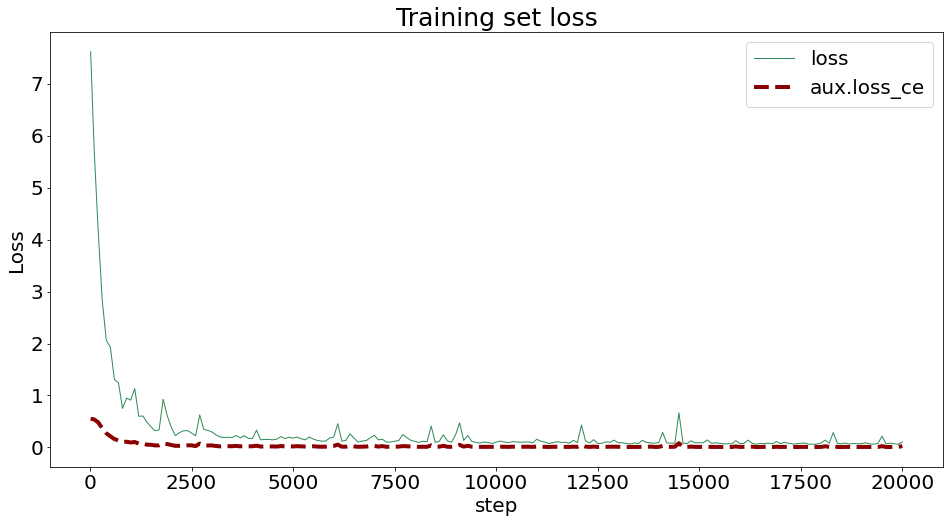

In [45]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('Training set loss', fontsize=25)

plt.legend(fontsize=20)
plt.savefig('charts/KNet-Training_Loss_Function.pdf', dpi=120, bbox_inches='tight')

plt.show()

## Training set accuracy

In [46]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

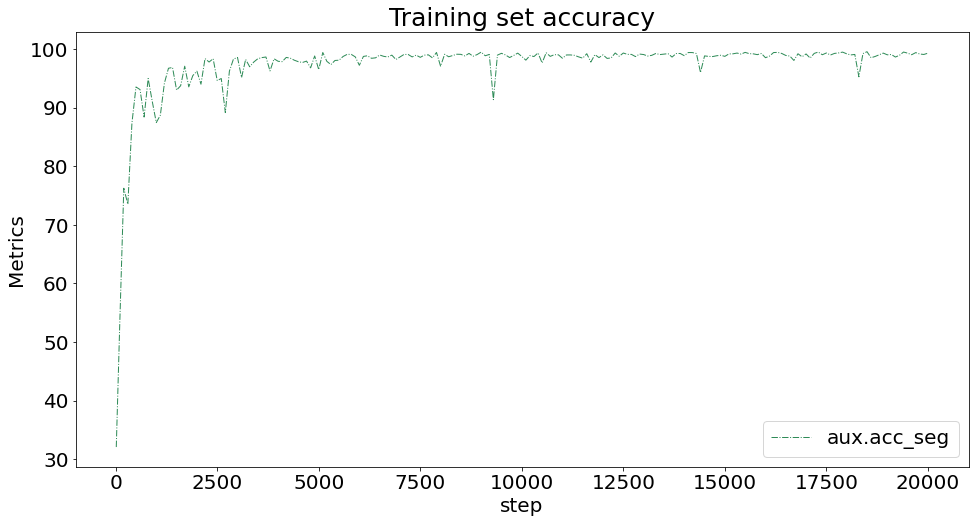

In [47]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('Training set accuracy', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('charts/KNet-Training_Set_Accuracy.pdf', dpi=120, bbox_inches='tight')

plt.show()

## Test set evaluation metrics

In [48]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall',
       'data_time', 'time', 'step'],
      dtype='object')

In [49]:
metrics = ['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall']

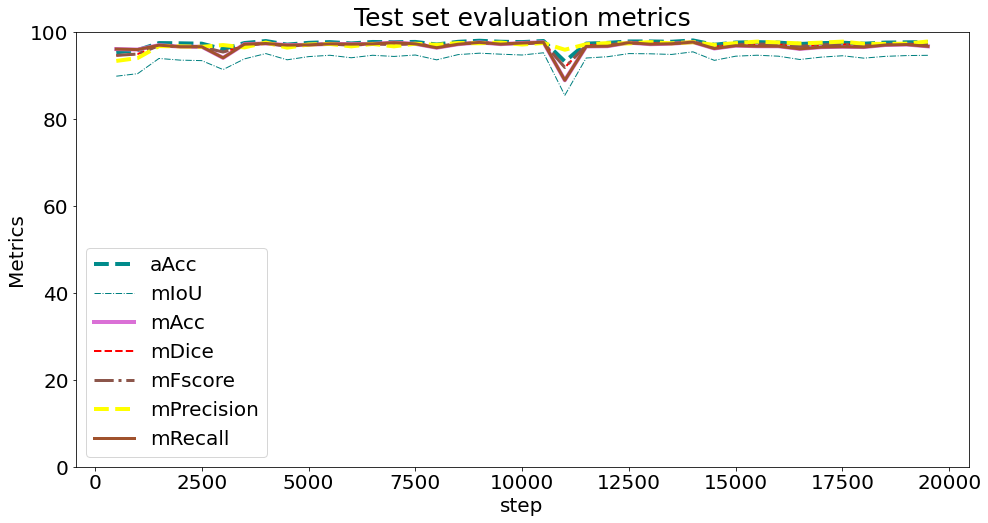

In [50]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('Test set evaluation metrics', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('charts/KNet-Test_Set_Evaluation_Metrics.pdf', dpi=120, bbox_inches='tight')

plt.show()